In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from pre_processor import Preprocessor
import time

## ベンチマーク用テキストの用意

In [2]:
text = """
今週は男２人でカフェ開拓してきたよv(^^)v
僕が頼んだのは濃厚なかぼちゃのﾀﾙﾄ。
うめーーーーー!!
超Ｄｅｌｉｃｉｏｕｓで接客もGoodでした😀
これで1,430.52円は安い!☆
お店のリンク: http://hogehoge.navi/fuga_cafe
#週末グルメ
<h1>タイトル<p>路地裏のカフェ</p></h1>
"""

texts = [text for _ in range(10000)]
processor = Preprocessor()

## 実行時間計測

### Benchmark start ###
1 core: 4.19 [sec]
2 core: 2.57 [sec]
4 core: 1.41 [sec]
6 core: 1.36 [sec]
8 core: 1.76 [sec]
### Benchmark finished ###


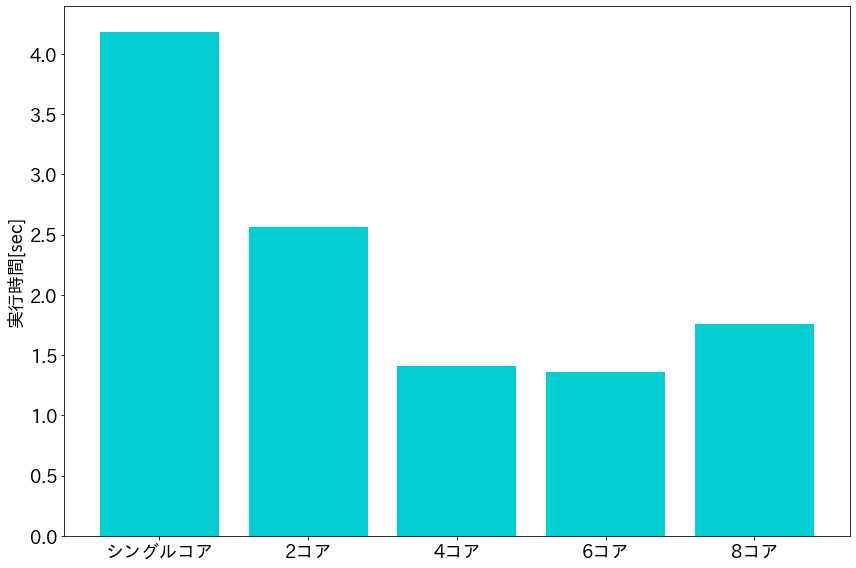

In [7]:
print("### Benchmark start ###")

elapse_times = []

# シングルコア実行
start = time.time()
result = processor.pipe_all(texts)
elapse = time.time() - start
print(f"1 core: {elapse:.2f} [sec]")
elapse_times.append(elapse)

# マルチコア実行
for num_process in [2, 4, 6, 8]:
    start = time.time()
    result = processor.parallel_pipe_all(texts, num_process = num_process)
    elapse = time.time() - start
    print(f"{num_process} core: {elapse:.2f} [sec]")
    elapse_times.append(elapse)

print("### Benchmark finished ###")

num_processes = ["シングルコア", "2コア", "4コア", "6コア", "8コア"]
fig = plt.figure(figsize=(12, 8))
plt.bar(num_processes, elapse_times, align = 'center', color = "#00CED1")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("実行時間[sec]", fontsize = 18)
plt.tight_layout()
# plt.savefig("並列計算との実行時間比較")
plt.show()

## 各処理ごとの実行時間内訳

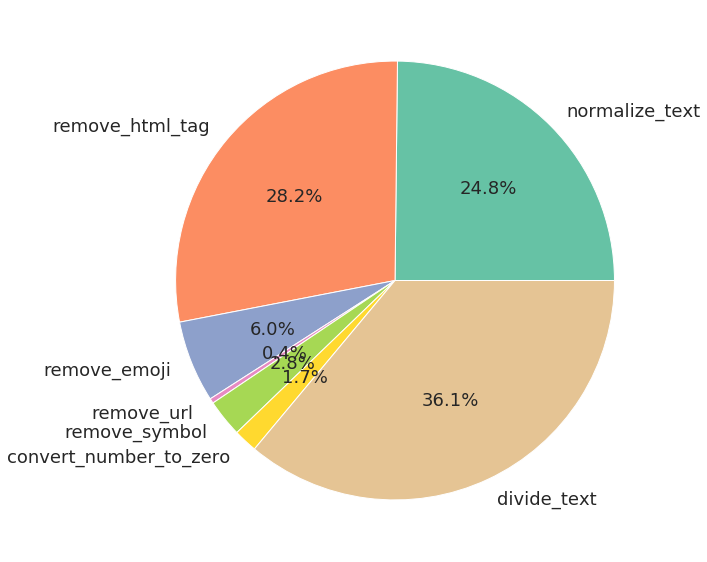

In [159]:
x = ["normalize_text", "remove_html_tag", "remove_emoji", "remove_url", "remove_symbol", "convert_number_to_zero", "divide_text"]
y = [1.17, 1.33, 0.284, 0.017, 0.13, 0.0823, 1.7]
plt.rcParams["font.size"] = 18
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pie(y, labels=x, autopct="%1.1f%%", textprops={'fontsize': 18})
plt.tight_layout()
plt.savefig("実行時間内訳")
plt.show()